In [6]:
include("../src/dependencies.jl");
pyplot()

Plots.PyPlotBackend()

In [7]:
param = ( ϵ  = 1/2,
            N  = 2^14,
            L  = 10,
            T  = 5,
            dt = 0.001)

(ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:875
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:875
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:877
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:877
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:878
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:878
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:879
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1040
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1040
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_set_axis_colors(::Plots.Subplot{Plots.PyPlotBackend}, ::PyCall.PyObject, ::Plots.Axis) at pyplot.jl:854
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:854
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_set_axis_colors(::Plots.Subplot{Plots.PyPlotBackend}, ::PyCall.PyObject, ::Plots.Axis) at pyplo

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_bbox_axislabel(::PyCall.PyObject, ::String) at pyplot.jl:300
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:300
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_bbox_title(::PyCall.PyObject) at pyplot.jl:316
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:316
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_bbox_title(::PyCall.PyObject) at pyplot.jl:316
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:316
┌ Warning: `getindex(o::PyObject, s

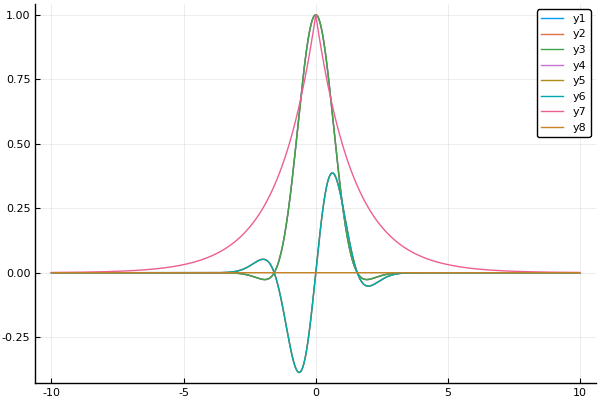

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _update_plot_object(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1244
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1244
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::Base64.Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1282
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:1282
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _show(::Base64.Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1282
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backen

In [8]:
init1 = HighFreq(merge(param,(s=2,freq=[0,10])))
init2 = HighFreq(merge(param,(s=2,freq=[0,50])))
init3 = HighFreq(merge(param,(s=2,freq=[0,100])))
init4 = Bellcurve(merge(param,(θ=1,p=2)))
x=Mesh(param).x
plot(x,[init1.η(x) init2.η(x) init3.η(x) init1.v(x) init2.v(x) init3.v(x) init4.η(x) init4.v(x)])

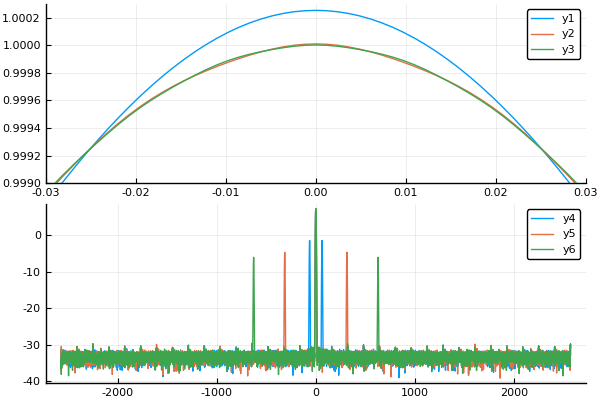

In [9]:
p = plot(layout=(2,1))
k=Mesh(param).k

plot!(p[1,1],x,[init1.η(x) init2.η(x) init3.η(x)],xlims=(-.03,.03),ylims=(0.9990,1.0003))
plot!(p[2,1],k,[log.(abs.(fft(init1.η(x)))) log.(abs.(fft(init2.η(x)))) log.(abs.(fft(init3.η(x))))])


In [10]:
inits = [init1,init2,init3]



models = []

push!(models,Matsuno_mod_naive(param));
push!(models,Matsuno_naive(param));
push!(models,Matsuno(param));

problems = []
for init in inits
    for model in models
        push!(problems,Problem(model, init, param));
    end
end

In [11]:
ni = length(inits)
nm = length(models)


function init(args...)
    indices = []
    for n in args
        append!(indices,range(nm*(n-1)+1, stop = nm*(n-1)+nm))
    end
    indices
end

function model(args...)
    indices = []
    for n in args
        append!(indices,range(n, stop = ni*nm, step = nm))
    end
    indices
end

model (generic function with 1 method)

In [12]:
function compute(p)
    for problem in p
        print("\nNow solving the model ",problem.model.label,"\n")
        @time solve!( problem )
        sleep(0.1)
    end
end

compute (generic function with 1 method)

In [13]:
compute(problems[init(1)])


Now solving the model modified Matsuno
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00


211.653205 seconds (16.28 M allocations: 137.551 GiB, 17.72% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 0:03:31



Now solving the model Matsuno naive
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00


268.578286 seconds (12.77 M allocations: 154.475 GiB, 20.01% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 0:04:29



Now solving the model Matsuno
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress: 100%|█████████████████████████████████████████|  ETA: 0:00:00


 80.148677 seconds (3.06 M allocations: 2.593 GiB, 1.13% gc time)


Progress: 100%|█████████████████████████████████████████| Time: 0:01:20


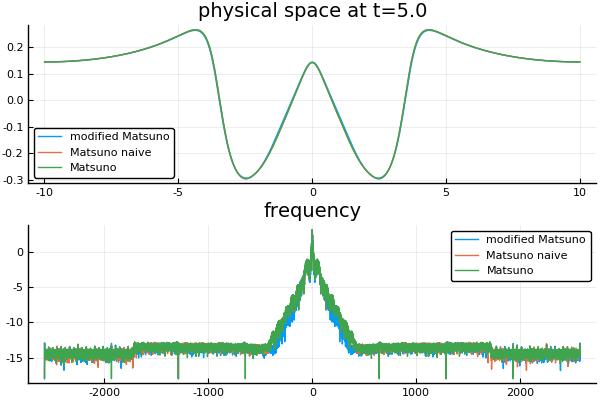

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:916
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:916
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:916
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/backends/pyplot.jl:916
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:917
└ @ Plots /Users/vduchene/.julia/packages/Plots/rmogG/src/bac

In [14]:
p = plot(layout=(2,1))
for problem in problems[init(1)]
    fig_problem!( p, problem ,5)
end
p

In [15]:
maximum(mapfro(models[1],problems[init(1)[1]].data.U[1000])[2].-mapfro(models[1],problems[init(1)[2]].data.U[1000])[2])

0.006746752837477388

In [16]:
maximum(mapfro(models[1],problems[init(1)[2]].data.U[1000])[2].-mapfro(models[1],problems[init(1)[3]].data.U[1000])[2])

9.028888747764086e-14